In [1]:
import pandas as pd

# File path
file_path = '/content/drive/MyDrive/iris_classification_data.xlsx'

# Read the training and testing sets into separate variables
training_set = pd.read_excel(file_path, sheet_name='Training Set')
testing_set = pd.read_excel(file_path, sheet_name='Testing Set')

# Display the first few rows of each dataset
print("Training Set:")
print(training_set.head())

print("\nTesting Set:")
print(testing_set.head())


Training Set:
   Index  Sepal Length  Sepal Width  Petal Length  Petal Width    Iris Type
0      1           5.4          3.9           1.7          0.4  Iris-setosa
1      2           4.6          3.4           1.4          0.3  Iris-setosa
2      3           5.0          3.4           1.5          0.2  Iris-setosa
3      4           4.4          2.9           1.4          0.2  Iris-setosa
4      5           4.9          3.1           1.5          0.1  Iris-setosa

Testing Set:
   Index  Sepal Length  Sepal Width  Petal Length  Petal Width    Iris Type
0      1           5.1          3.5           1.4          0.2  Iris-setosa
1      2           4.9          3.0           1.4          0.2  Iris-setosa
2      3           4.5          2.3           1.3          0.3  Iris-setosa
3      4           4.6          3.1           1.5          0.2  Iris-setosa
4      5           5.0          3.6           1.4          0.2  Iris-setosa


In [2]:
training_set = training_set.drop(columns=['Index'], errors='ignore')
testing_set = testing_set.drop(columns=['Index'], errors='ignore')

In [3]:
# Display the first few rows of each dataset
print("Training Set:")
print(training_set.head())

print("\nTesting Set:")
print(testing_set.head())

Training Set:
   Sepal Length  Sepal Width  Petal Length  Petal Width    Iris Type
0           5.4          3.9           1.7          0.4  Iris-setosa
1           4.6          3.4           1.4          0.3  Iris-setosa
2           5.0          3.4           1.5          0.2  Iris-setosa
3           4.4          2.9           1.4          0.2  Iris-setosa
4           4.9          3.1           1.5          0.1  Iris-setosa

Testing Set:
   Sepal Length  Sepal Width  Petal Length  Petal Width    Iris Type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.5          2.3           1.3          0.3  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
unique_values = training_set['Iris Type'].unique()
print("Unique values in 'Iris Type':", unique_values)


Unique values in 'Iris Type': ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
from sklearn.preprocessing import MinMaxScaler

def preprocess_data(training_set, testing_set):
    # 1. Replace 'Iris Type' values with 1, 2, 3
    iris_type_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    training_set['Iris Type'] = training_set['Iris Type'].map(iris_type_mapping)
    testing_set['Iris Type'] = testing_set['Iris Type'].map(iris_type_mapping)

    # 2. Scale numeric columns: 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'
    scaler = MinMaxScaler()

    columns_to_scale = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

    # Fit on the training set and transform both train and test set
    training_set[columns_to_scale] = scaler.fit_transform(training_set[columns_to_scale])
    testing_set[columns_to_scale] = scaler.transform(testing_set[columns_to_scale])

    # 3. Separate data and labels
    train_data = training_set[columns_to_scale]
    train_label = training_set['Iris Type']

    test_data = testing_set[columns_to_scale]
    test_label = testing_set['Iris Type']

    return train_data, train_label, test_data, test_label

In [6]:
# Example usage:
train_data, train_label, test_data, test_label = preprocess_data(training_set, testing_set)

# Optionally, print the preprocessed data
print("Training Data:")
print(train_data.head())
print("\nTraining Labels:")
print(train_label.head())
print("\nTesting Data:")
print(test_data.head())
print("\nTesting Labels:")
print(test_label.head())

Training Data:
   Sepal Length  Sepal Width  Petal Length  Petal Width
0      0.305556     0.791667      0.118644     0.125000
1      0.083333     0.583333      0.067797     0.083333
2      0.194444     0.583333      0.084746     0.041667
3      0.027778     0.375000      0.067797     0.041667
4      0.166667     0.458333      0.084746     0.000000

Training Labels:
0    0
1    0
2    0
3    0
4    0
Name: Iris Type, dtype: int64

Testing Data:
   Sepal Length  Sepal Width  Petal Length  Petal Width
0      0.222222     0.625000      0.067797     0.041667
1      0.166667     0.416667      0.067797     0.041667
2      0.055556     0.125000      0.050847     0.083333
3      0.083333     0.458333      0.084746     0.041667
4      0.194444     0.666667      0.067797     0.041667

Testing Labels:
0    0
1    0
2    0
3    0
4    0
Name: Iris Type, dtype: int64


In [7]:
import tensorflow as tf

In [8]:
train_data = tf.constant(train_data)
train_label = tf.constant(train_label)
test_data = tf.constant(test_data)
test_label = tf.constant(test_label)

In [9]:
print('Train Data Shape:')
train_data.shape

Train Data Shape:


TensorShape([135, 4])

In [10]:
print('Train Label Shape:')
train_label.shape

Train Label Shape:


TensorShape([135])

In [11]:
print('Test Data Shape:')
test_data.shape

Test Data Shape:


TensorShape([15, 4])

In [12]:
print('Test Label Shape:')
test_label.shape

Test Label Shape:


TensorShape([15])

In [13]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.Input(shape=(4,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [14]:
# Compile the model with a learning rate of 0.01
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Fit the model to the training data
history = model.fit(
    train_data,
    train_label,
    epochs=100,
    batch_size=32,
    validation_data=(test_data, test_label)
)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 593ms/step - accuracy: 0.3271 - loss: 1.1159 - val_accuracy: 0.4000 - val_loss: 1.0926
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5506 - loss: 1.0792 - val_accuracy: 0.6667 - val_loss: 1.0641
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6780 - loss: 1.0545 - val_accuracy: 0.7333 - val_loss: 1.0498
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7787 - loss: 1.0383 - val_accuracy: 0.8667 - val_loss: 1.0365
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7365 - loss: 1.0271 - val_accuracy: 0.7333 - val_loss: 1.0222
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7352 - loss: 1.0097 - val_accuracy: 0.7333 - val_loss: 1.0069
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7730 - loss: 0.9925 - val_accuracy: 0.7333 - val_loss: 0.9911
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7654 - loss: 0.9707 - val_accuracy: 0.7333 - val_loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.1514
Test Loss: 0.15141448378562927
Test Accuracy: 1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


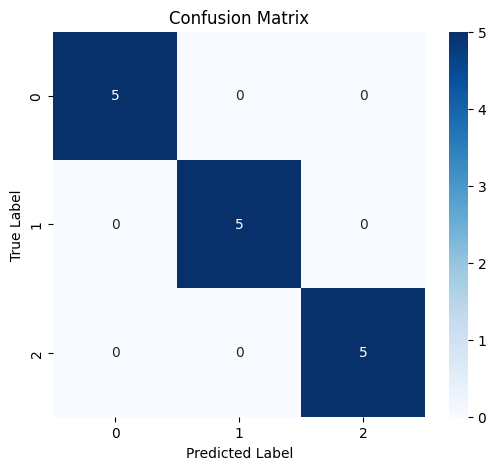

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_label)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict the labels for the test set
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)  # Get the predicted class (0, 1, or 2)

# Generate confusion matrix
cm = confusion_matrix(test_label, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
